# END SEM PROJECT (CAR DATA ANALYSIS)

Submitted to Dr Kiran Sharma


Submitted by Pradyumn Garg(200239), Rishwik Reddy(200218)

Github Link to the dataset chosen by us: https://github.com/Pradyumn-Garg/Python-End-Sem-Project/blob/main/CarPrice.csv

# 1. Problem Statement <a id='Problem Statement'></a>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# 2. Table of Content  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>


- <a href='#Table of Contents'>2. Table of Contents</a>


- <a href='#Data Imports'>3. Library Imports</a>

- <a href='#Load Data'>4. Load Data</a>

- <a href='#Data Preparation'>5. Data Preparation</a>
    
- <a href='#Visualise Data'>6. Visualise Data</a>   
    - <a href='#Visualise Numerical Columns'>6.1 Visualise Numerical Columns </a>
    - <a href='#Visualise Categorical Columns'>6.1 Visualise Categorical Columns </a>
    



# 3. Library Imports  <a id='Data Imports'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline
warnings.filterwarnings('ignore')




# 4. Reading and understanding data

In [84]:
try:
    carprice_df = pd.read__csv("C:\Python\CarPrice.csv")
    
except:
    print("Error Occured")
else:
    print("It just Worked fine")
finally:
     print("ohh...! it not worked")

Error Occured
ohh...! it not worked


In [82]:
try:
    carprice_df = pd.read_csv("C:\Python\CarPrice.csv")
    
except:
    print("Error Occured")
else:
    print("It just Worked fine")
finally:
    print("hurray...! it worked")

It just Worked fine
hurray...! it worked


In [83]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Observations from dataframe info
- From above cell it can be seen that there are no null columns
- Also it can be seen that column symboling is numeric column. 


In [5]:
## Lets bring price column in front
carprice_df = carprice_df[ ['price'] + [ col for col in carprice_df.columns if col != 'price' ] ]
carprice_df.head()

,price,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,16500.0,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,16500.0,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,13950.0,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,17450.0,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


# 5. Data Preparation<a id='Data Preparation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Drop car_ID as its the unique Id of each observation and will be of no help


In [7]:
carprice_df.drop(columns='car_ID',inplace=True)

In [8]:
carprice_df.describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,7988.852332,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,7788.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,10295.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,16503.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,45400.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


###  Car Name is a combination of two:
- company
- model
- We will segregate Car Name with compnay name and model
- Since the price of car is determined only by Company Name so we will drop model 
- Finally we will drop CarName column 

In [9]:
#Filter company name from CarName column
carprice_df['company'] = carprice_df['CarName'].str.split(' ', 1).str[0]
#drop CarName column
carprice_df.drop(columns='CarName',inplace=True)
carprice_df.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
0,13495.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,16500.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,16500.0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,13950.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,17450.0,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [10]:
# Check for the list of categorical columns
cat_columns = [col for col in carprice_df.columns if carprice_df[col].dtype=='object']
cat_columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [11]:
## Check for value counts of categorical columns
for col in cat_columns:
    print('*********************')
    print('column: {0} has {1} distinct values'.format(col,len(carprice_df[col].value_counts())))
    print(carprice_df[col].value_counts().sort_index())

*********************
column: symboling has 6 distinct values
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
Name: symboling, dtype: int64
*********************
column: fueltype has 2 distinct values
diesel     20
gas       185
Name: fueltype, dtype: int64
*********************
column: aspiration has 2 distinct values
std      168
turbo     37
Name: aspiration, dtype: int64
*********************
column: doornumber has 2 distinct values
four    115
two      90
Name: doornumber, dtype: int64
*********************
column: carbody has 5 distinct values
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64
*********************
column: drivewheel has 3 distinct values
4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64
*********************
column: enginelocation has 2 distinct values
front    202
rear       3
Name: enginelocation, dtype: int64
*********************
column: enginetype has 7 distinct values
do

## Observations from above listing of categorical columns:
- drivewheel has 3 values ('fwd','rwd','4wd'). It seems
    - 'fwd' has been mis-spelled as '4wd'. So we will replace '4wd' with 'fwd'
- company has 28 distinct values. It seems
    - 'nissan' has two values 'nissan' and 'Nissan'. We will replace 'Nissan' with 'nissan' to align it with other values
    - 'mazda' has been mis-spelled as 'maxda'. We will replace it with 'mazda'
    - 'porsche' has been mis-spelled as 'porcshce'. We will replace it with 'porsche'
    - 'toyota' has been mis-spelled as 'toyouta'. We will replace it with 'toyota'
    - 'volkswagen' has been mis-spelled as 'vokswagen', 'vw'. We will replace it with 'vokswagen'

### Function to replace old values with new values

In [12]:
# function to replace old values with new values
class replace:
    def replace_val(self,col,val_dict,df):
        for oldval,newval in val_dict.items():
            df[col].replace(oldval,newval,inplace=True)
        return df

In [13]:
r=replace()

In [14]:
#correct drivewheel values 
carprice_df = r.replace_val('drivewheel',{'4wd':'fwd'},carprice_df)
carprice_df['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [15]:
#correct company values
carprice_df = r.replace_val('company',{'Nissan':'nissan',
                                     'maxda':'mazda',
                                     'porcshce':'porsche',
                                     'toyouta':'toyota',
                                     'vokswagen':'volkswagen',
                                     'vw':'volkswagen'},carprice_df)
carprice_df['company'].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: company, dtype: int64

# 6. Data Visualisation<a id='Visualise Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 6.1 Visualise numerical columns<a id='Visualise Numerical Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [16]:
#do the pairplot of selected features
class pair:
    def pairplot_features(self,df,numeric_features,target):
        features_count = len(numeric_features)
        for i in range(0,features_count,2):
            if (i+1)<features_count:
                g=sns.pairplot(df, kind='reg', x_vars=numeric_features[i:i+2],y_vars = target)
            else:
                g=sns.pairplot(df, kind='reg', x_vars=numeric_features[i],y_vars = target)
            g.fig.set_size_inches(10,5)

In [17]:
p=pair()

In [18]:
#list of all numerical features
numeric_features = list(carprice_df.select_dtypes(include=np.number))
numeric_features.remove('price')
numeric_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [86]:
#sns.pairplot(carprice_df);

try:
    pairplot_feature(carprice_df,numeric_features,'price')
except:
    print("the Error has occured")
else:
    print("Its fine no error")
finally:
    print("hurray...! it has worked")

the Error has occured
hurray...! it has worked


It just Worked fine
hurray...! it worked


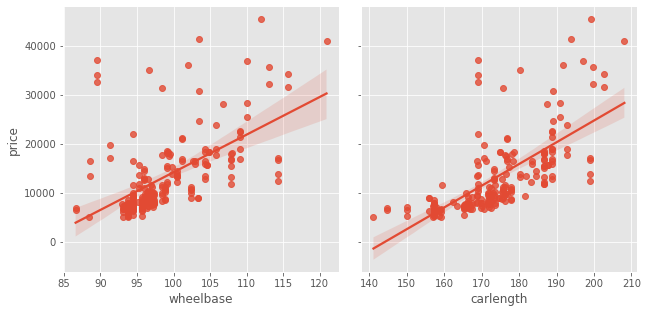

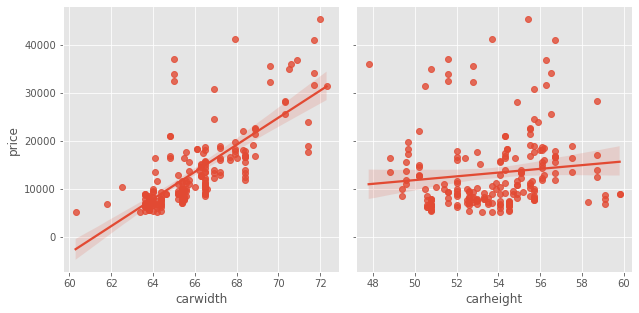

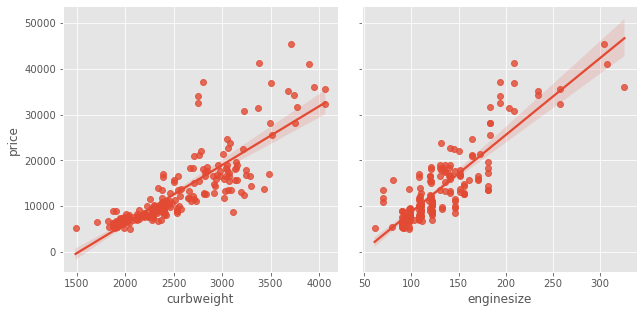

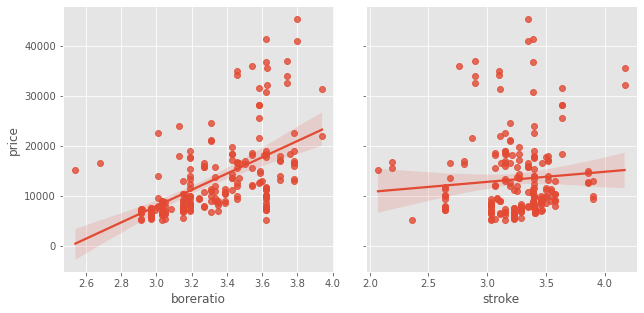

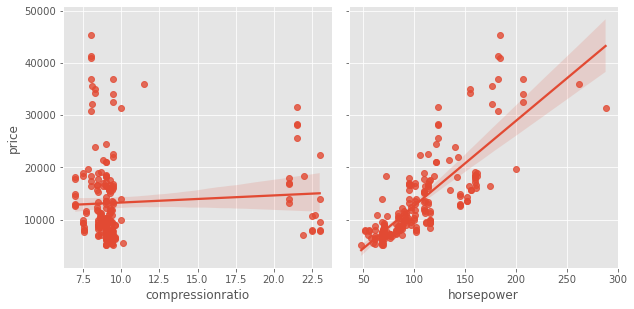

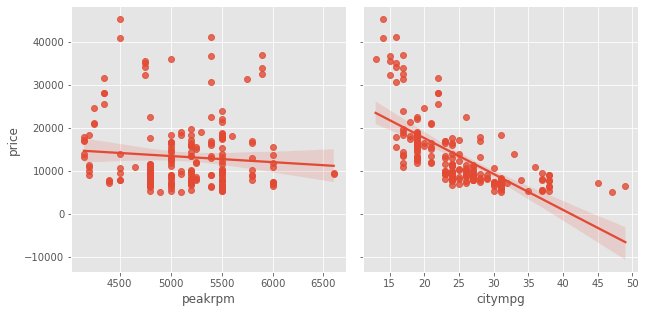

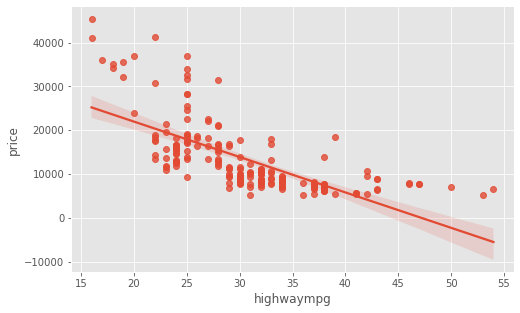

In [87]:
#sns.pairplot(carprice_df);

try:
    p.pairplot_features(carprice_df,numeric_features,'price')
except:
    print("Error Occured")
else:
    print("It just Worked fine")
finally:
    print("hurray...! it worked")

## Observations from above plot
- It seems curbweight, enginesize, horsepower, carwidth have positive correlation with price column
- citympg, highwaympg, perkrmp seems to have negative correlation with price column

## Lets check for correlation of these numeric columns with price

In [21]:
carprice_corr = carprice_df.corr()
carprice_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)


,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599
wheelbase,0.577816,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.682920,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.759325,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.119336,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,0.835305,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,0.874145,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,0.553173,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,0.079443,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,0.067984,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


In [22]:
## Find highly correlated columns wrt target variable and correlation coefficient
carprice_corr[abs(carprice_corr['price'])>0.5]['price'].sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

## Observations from above correlation matrix
- It can be clearly seen that variables enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio share a positive correlation with target variable price. 
- enginesize,curbweight,horsepower,carwidth, carlength seem to have a strong correlation with target variable price
- citympg and highwaympg share strong negative correlation with target variable price. 
- peakrpm also has a negative correlation with target variable price but the correlation coefficient is not that significant

## Lets check target column price for outliers, distribution, mean, meadin etc

## Function to Check for distribution of numeric columns

In [23]:
plt.style.use('ggplot')
class subplot:
    def subplot_histograms(self,dist_df, list_of_columns, cols = 2):
        nrows = int(np.ceil(len(list_of_columns)/cols)) # Makes sure you have enough rows

        #Scales the height of the fig to accomodate a long list of features    
        fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=(25, len(list_of_columns)*(10/cols)),squeeze=False) 
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            try:
                sns.distplot(dist_df[column], ax=ax[i],fit=norm, kde=True) 
                mean_val = dist_df[column].mean()



                normality_test = stats.normaltest(dist_df[column]).pvalue < 0.05
                ax[i].set_title("Histogram for {}".format(list_of_columns[i]),color='blue')
                ax[i].set_xlabel(list_of_columns[i]) 
                ax[i].axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
                ax[i].text(0.75, 0.83, "Normal: {}".format(not normality_test), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)
                ax[i].legend()
            except:
                ax[i].text(0.75, 0.5, "Could not plot {}".format(column), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

In [24]:
s=subplot()

In [25]:
#Lets check for different percentiles to get a fair idea of how observations are distributed
carprice_df[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
85%,18500.000000
90%,22563.000000
100%,45400.000000


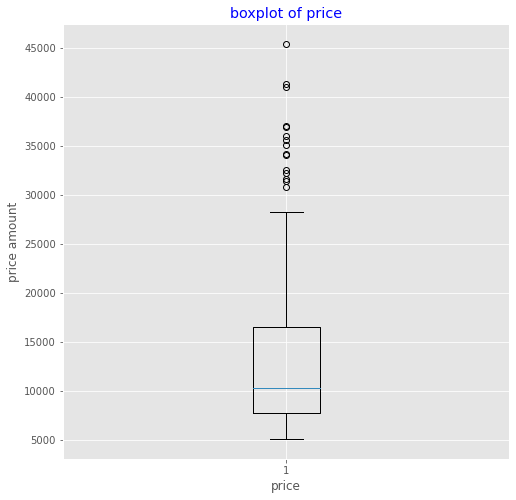

In [26]:
plt.figure(figsize=(8,8))
plt.boxplot(carprice_df['price']);
plt.title('boxplot of price',color='blue')
plt.xlabel('price')
plt.ylabel('price amount');

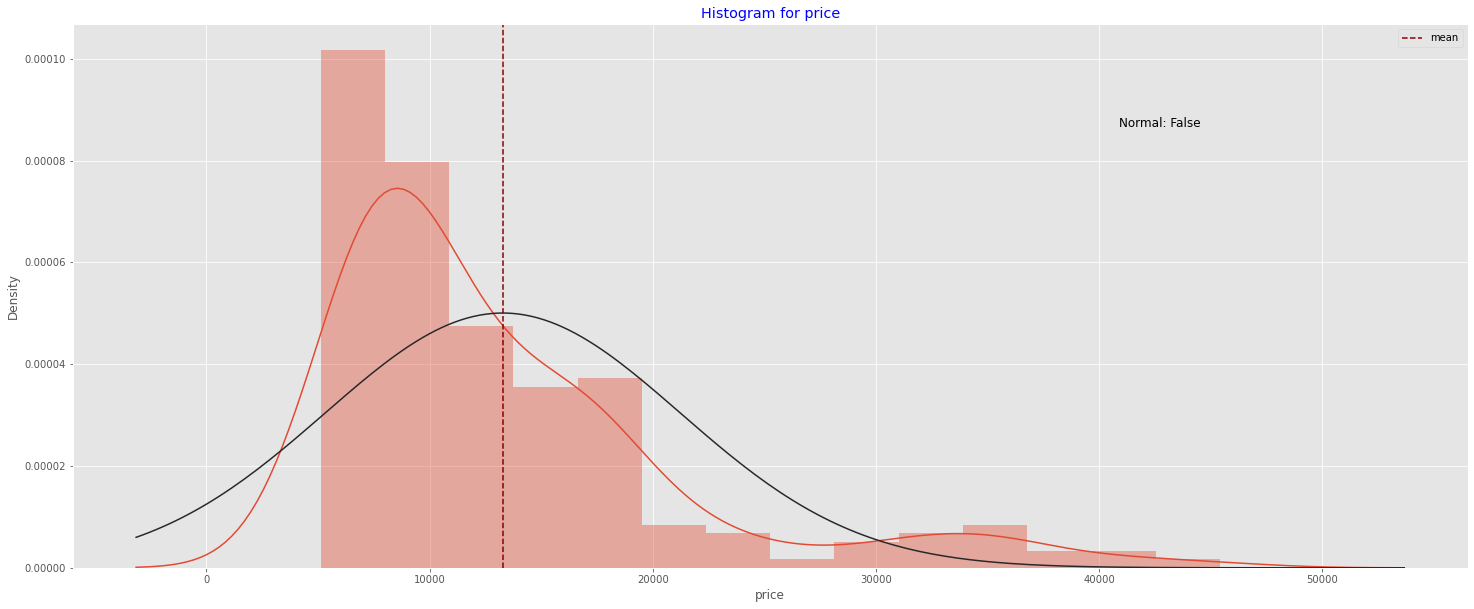

In [27]:
#subplot_histograms(carprice_df, num_features, cols = 2)
s.subplot_histograms(carprice_df, ['price'], cols = 1)

## Observation from above plots
- the ditribution of price column is not normal
- its right skewed. This means most of the obseravtions have price 16000. It can be seen from percentile description as well
- the mean of distribtion is around 13000 while the median is around 10000
- There are many observations far from mean meaning high variance. 85% of observations have price values below 18500 while remaining 15% are within range of [18500,45400]. Clearly there are many outliers

## Lets visualise the distibution of other numerical columns

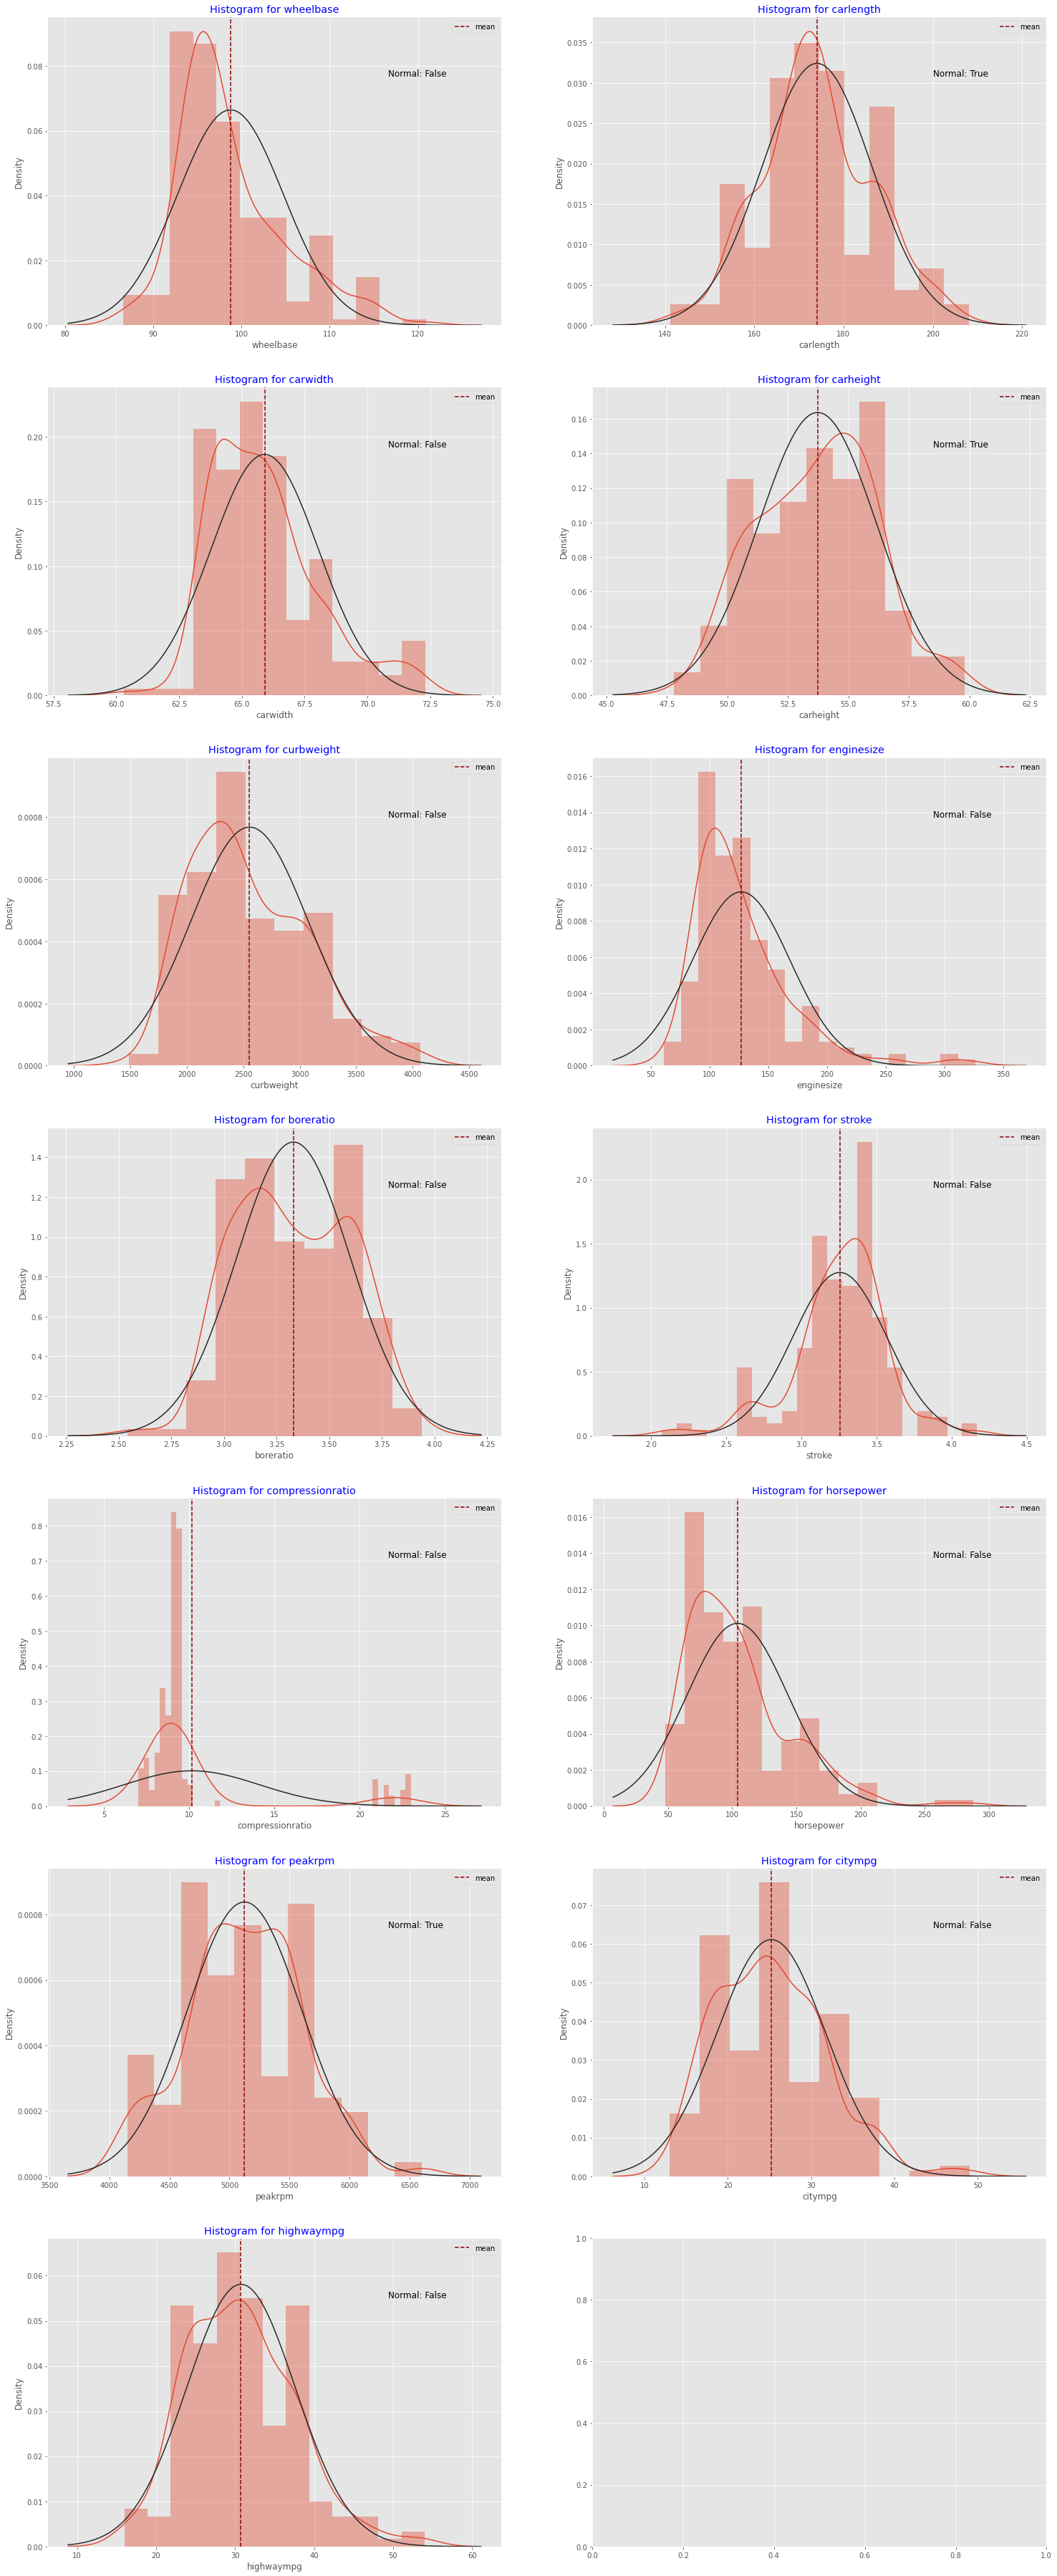

In [89]:
# num_features = numeric_features.copy()
# num_features.add('price')
s.subplot_histograms(carprice_df, numeric_features, cols = 2)

## Observations from above plot
- carwidth, carlength, peakrpm follow normal distribution
- rest all features do not follow normal distribution
- We will apply MinMaxScalar for all these numerical columns since for most of the columns the distribution is not normal

# 6.2 Visualize categorical columns<a id='Visualise Categorical Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Common function to plot boxplot and fequency plot of categorical columns

In [36]:
#do the pairplot of selected features
class boxplot:
    def boxplot_features(self,df,categorical_features,target):
        features_count = len(categorical_features)
        if features_count%2 == 0:
            nrows=features_count//2
        else:
            nrows=features_count//2 + 1
        fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, features_count*3), sharex=False, sharey=False)
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i in range(features_count):
            ax[i].set_title("Boxplot for {}".format(categorical_features[i]),color='blue')
            ax[i].set_xlabel(categorical_features[i]) 
            sns.boxplot(data=df, x = categorical_features[i],y = target,ax=ax[i])
        plt.show();
    def boxplot_countplot_features(self,df,feature,target,another_row=False):
        if another_row:
            fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(25,30))
        else:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
        fig.subplots_adjust(hspace=0.3)
        fig.subplots_adjust(wspace=0.3)

        ## plot the countplot
        ax1.set_title("Frequency plot for {}".format(feature),color='blue')
        ax1.set_xlabel(feature)
        sns.countplot(x=feature,data=df,ax=ax1);

        ## plot the boxplot
        ax2.set_title("Boxplot for {}".format(feature),color='blue')
        ax2.set_xlabel(feature) 
        sns.boxplot(data=df, x = feature,y = target,ax=ax2)


In [37]:
b=boxplot()

In [38]:
#list of all categorical features
categorical_features = list(carprice_df.select_dtypes(include=np.object))
categorical_features.remove('company')#will plot company separately
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## 1. Lets plot frequency of different types of symboling and car price range for symboling

In [39]:
carprice_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [40]:
round(carprice_df.groupby('symboling')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                          \
          count      mean      std      min      25%      50%       75%   
symboling                                                                 
-2          3.0  15781.67  2745.65  12940.0  14462.5  15985.0  17202.50   
-1         22.0  17330.68  7640.56   8921.0  10748.0  16132.5  22223.75   
 0         67.0  14366.97  8752.40   6575.0   8426.5  11259.0  16912.50   
 1         54.0  10037.91  7283.04   5195.0   6559.0   7554.0   9188.38   
 2         32.0  10109.28  3886.13   5118.0   7465.5   8995.0  11704.25   
 3         27.0  17221.30  8027.99   8499.0  12239.5  14869.0  17674.50   

                                                
                85%      90%     100%      max  
symboling                                       
-2         17689.50  17933.0  18420.0  18420.0  
-1         25112.95  27978.4  34184.0  34184.0  
 0         18606.60  29209.6  41315.0  41315.0  
 1         16500.15  18192.3  45400.0  45400.0  
 2         15341.00  16338.0  18620.0  18620.0  
 3         23069.00  33128.0  37028.0  37028.0

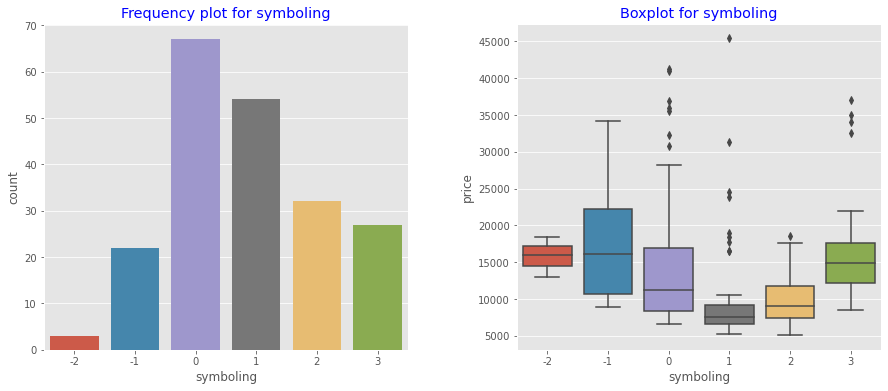

In [41]:
b.boxplot_countplot_features(carprice_df,'symboling','price')

## Observations from above plot
- The total number of observations for symboling as '0' (67) is the highest followed by type 1 (54), type 2 (32), type 3 (27), type -1 (22), type -2 (3)
- This means that people with risk as neutral buy more number of cars followed by low(1), medium(2) and high(3) risk
- Buying count of low risk cars (-1,-2) is very low
- cars with fueltype as 'gas' have many variance in price, there are many outliers within the range of [30000,45000]. The median price for feultype 'gas' is around 10500 while that for feultype 'diesel' is around 14000
- cars with symboling -1 have highest price around 35000, followed by symboling of 0. There are some outliers for symboling 0 and 1 with highest price of car around 45000 for symboling 1. For outliers, this means there are few cars with high price even though the insurance risk rating is neutral(0) or towards mid risk(1) or high risk (3). 
    - Please note that as per data dictionary, symboling is assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
- It can be seen that the price cars with risk level 2 is lowest (5118.0) followed by risk level 1 (5195.0) but the mean and median of risk level 1 is lowest (mean - 10037.91, median - 7554.0)

## 2. Lets plot frequency of different types of fuel and car price range for such fueltypes

In [42]:
carprice_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [43]:
round(carprice_df.groupby('fueltype')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                                \
          count      mean      std     min     25%      50%      75%      85%   
fueltype                                                                        
diesel     20.0  15838.15  7759.84  7099.0  9120.0  13852.5  19375.5  25945.6   
gas       185.0  12999.80  7984.41  5118.0  7689.0   9989.0  15998.0  18327.6   

                                     
              90%     100%      max  
fueltype                             
diesel    28183.2  31600.0  31600.0  
gas       21333.0  45400.0  45400.0

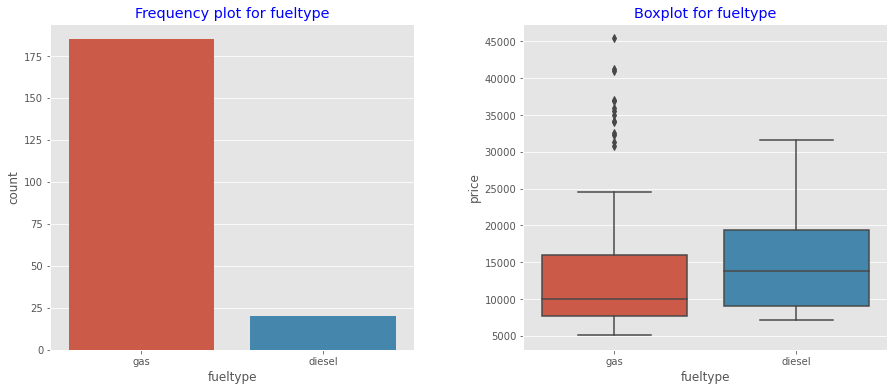

In [44]:
b.boxplot_countplot_features(carprice_df,'fueltype','price')

## Observations from above plot
- The total number of observations for fueltype as 'gas' (185) are more than feultype 'diesel' (20)
- car observation data points with fueltype as 'gas' have many variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for feultype 'diesel' (mean price - 15838.15, median price - 13852.5) is more than that of gas (mean price - 12999.80, median price - 9989.0)

## 3. Lets plot frequency of different aspiration types and car price range

In [45]:
carprice_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [46]:
round(carprice_df.groupby('aspiration')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min      25%      50%      75%   
aspiration                                                                
std         168.0  12611.27  8214.34  5118.0   7446.0   9418.0  15527.5   
turbo        37.0  16298.17  6098.89  7689.0  11694.0  16503.0  18950.0   

                                                 
                 85%      90%     100%      max  
aspiration                                       
std         17437.45  21219.0  45400.0  45400.0  
turbo       22563.00  24545.8  31600.0  31600.0

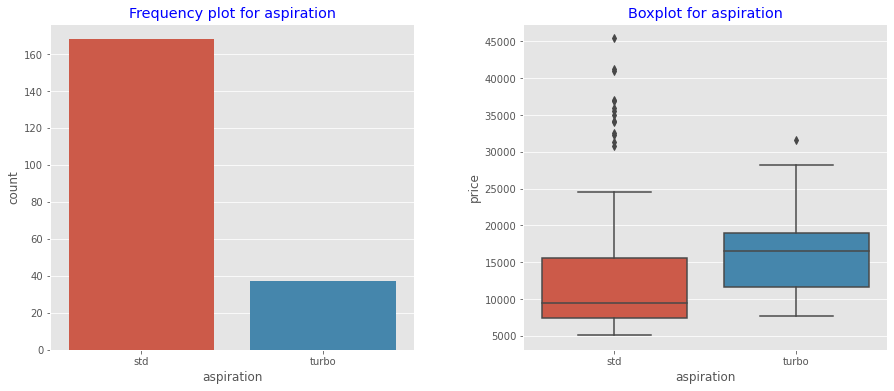

In [47]:
b.boxplot_countplot_features(carprice_df,'aspiration','price')

## Observations from above plot
- Mostly used aspiration in car is std (168) than aspiration turbo (37)
- cars with aspiration as 'std' have more variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for aspiration 'std' (mean price - 12611.27, median price - 9418.0) is lower than that for aspiration 'turbo' (mean price - 16298.17, median price - 16503.0)
- 85% of cars with aspiration as 'std' have price range within [5118.0, 17437.45]. Rest 15% are within the range of [17437.45, 45400.0]. Clearly there are outliers with 45400.0 being the highest price
- 85% of cars with aspiration as 'turbo' have price range within [7689.0, 22563.00]. Rest 15% are within the range of [22563.00, 31600.0]. There is an outliers with 31600.0 being the highest price
- Both cheapest price (5118.0) as well costliest price (45400.0) are for aspiration type 'std'

## 4. Lets plot frequency of different doornumber types and car price range

In [48]:
carprice_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [49]:
round(carprice_df.groupby('doornumber')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min     25%      50%       75%   
doornumber                                                                
four        115.0  13501.15  7338.30  6229.0  8006.0  10898.0  16872.50   
two          90.0  12989.92  8784.23  5118.0  7171.5   9927.0  15909.75   

                                                 
                 85%      90%     100%      max  
doornumber                                       
four        18890.00  22563.0  40960.0  40960.0  
two         18048.21  22633.8  45400.0  45400.0

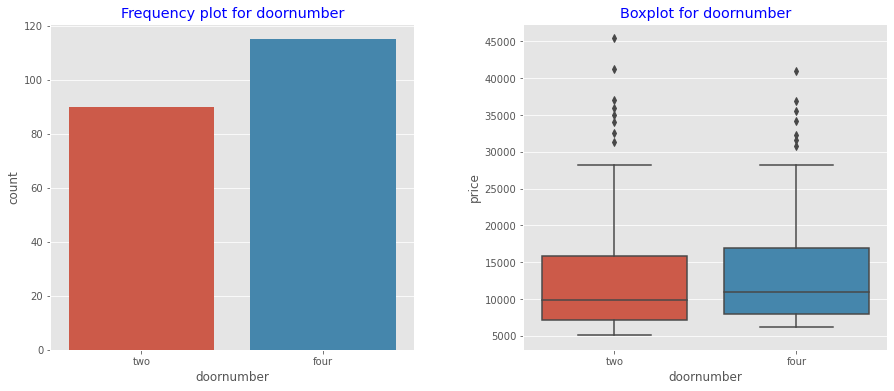

In [50]:
b.boxplot_countplot_features(carprice_df,'doornumber','price')

## Observations from above plot
- Mostly sold cars are with doornumber four (115) than doornumber two (90)
- cars with doornumber two have more variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for doornumber two is lower (mean price - 12989.92 and median price - 9927.0) than doornumber four (mean price - 13501.15, median price - 10898.0)
- 85% of cars with doornumber two have price range within [5118.0, 18048.21]. Rest 15% are within the range of [18048.21, 45400.0]. Clearly there are outliers with 45400.0 being the highest price
- 85% of cars with doornumber four have price range within [6229.0, 18890.00]. Rest 15% are within the range of [18890.00, 40960.0]. There are outliers with 40960.0 being the highest price
- Both cheapest price (5118.0) as well costliest price (45400.0) are for car with doornumber four

## 5. Lets plot frequency of different carbody types and car price range

In [51]:
carprice_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [52]:
round(carprice_df.groupby('carbody')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                            \
            count      mean       std      min       25%      50%       75%   
carbody                                                                       
convertible   6.0  21890.50  11187.80  11595.0  14246.25  17084.5  30709.25   
hardtop       8.0  22208.50  14555.52   8249.0   9341.50  19687.5  32903.00   
hatchback    70.0  10376.65   4909.64   5118.0   6564.00   8897.0  12730.25   
sedan        96.0  14344.27   8470.49   5499.0   8042.25  10846.5  17770.00   
wagon        25.0  12371.96   5120.95   6918.0   8013.00  11694.0  15750.00   

                                                  
                  85%      90%     100%      max  
carbody                                           
convertible  35549.00  36042.0  37028.0  37028.0  
hardtop      33953.00  37439.6  45400.0  45400.0  
hatchback    15874.45  16622.1  31400.5  31400.5  
sedan        21390.00  25058.5  41315.0  41315.0  
wagon        16847.00  18182.0  28248.0  28248.0

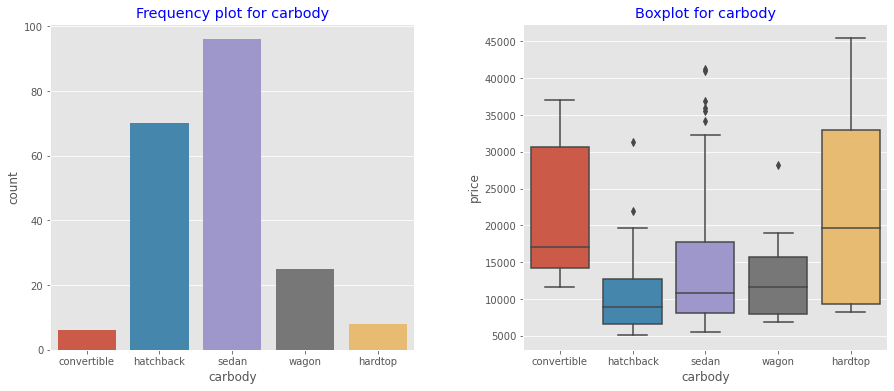

In [53]:
b.boxplot_countplot_features(carprice_df,'carbody','price')

## Observations from above plot
- Mostly sold cars are with carbody sedan (96), followed by hatchback (70), wagon (25), hardtop (8), convertible (6)
- cars with carbody hardtop have more variance in price
- The mean and median price for carbody hatchback is lowest (mean price - 10376.65 and median price - 8897.0)
- Carbody hardtop has the highest mean and median price  (mean price - 22208.50, median price - 19687.5) followed by convertible (mean price - 21890.50, median price - 17084.5)
- For cars with carbody hatchback, 85% of car price is within the the range [5118.0, 15874.45]. Rest 15% are within the range of [15874.45, 31400.5]. Clearly there are outliers with maximum price of 31400.5
- car price for carbody sedan also has many outliers. 85% of cars are within the range of [5499.0, 21390.00	]. Rest 15% are within the range of [21390.00, 41315.0] with 41315.0 being the highest price for carbody sedan

## 6. Lets plot frequency of different drivewheel types and car price range

In [54]:
carprice_df['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [55]:
round(carprice_df.groupby('drivewheel')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min      25%      50%      75%   
drivewheel                                                                
fwd         129.0   9368.25  3384.13  5118.0   7099.0   8358.0  10595.0   
rwd          76.0  19910.81  9120.14  6785.0  13475.0  16912.5  23110.0   

                                                
                85%      90%     100%      max  
drivewheel                                      
fwd         12881.8  14039.8  23875.0  23875.0  
rwd         32087.5  34620.0  45400.0  45400.0

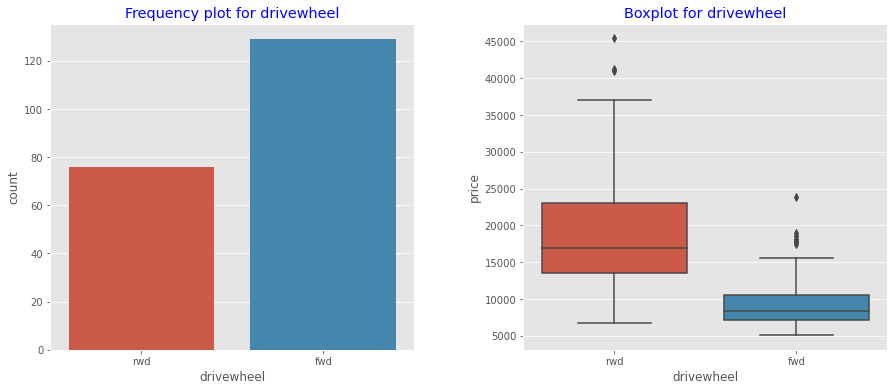

In [56]:
b.boxplot_countplot_features(carprice_df,'drivewheel','price')

## Observations from above plot
- Mostly sold cars are with drivewheel fwd (129), followed by rwd (76)
- cars with drivewheel rwd have more variance in price
- The mean and median price for drivewheel fwd is lowest (mean price - 9368.25 and median price - 8358.0)
- drivewheel fwd mean and median price as (mean price - 19910.81, median price - 16912.5) 
- maximum car price is for the car with drivewheel rwd
- 85% of car price for cars with drivewheel fwd is within the the range [5118.0, 12881.8]. Rest 15% are within the range of [12881.8, 23875.0]. Clearly there are outliers with maximum price of 23875.0
- car price for cars with drivewheel rwd also has few outliers. 85% of cars are within the range of [6785.0, 32087.5]. Rest 15% are within the range of [32087.5, 45400.0] with 45400.0 being the highest price

## 7. Lets plot frequency of different enginelocation types and car price range

In [57]:
carprice_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [58]:
round(carprice_df.groupby('enginelocation')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                         \
                count     mean      std      min       25%      50%      75%   
enginelocation                                                                 
front           202.0  12961.1  7607.98   5118.0   7778.25  10221.5  16482.5   
rear              3.0  34528.0  2291.29  32528.0  33278.00  34028.0  35528.0   

                                                    
                    85%      90%     100%      max  
enginelocation                                      
front           18334.4  21447.0  45400.0  45400.0  
rear            36128.0  36428.0  37028.0  37028.0

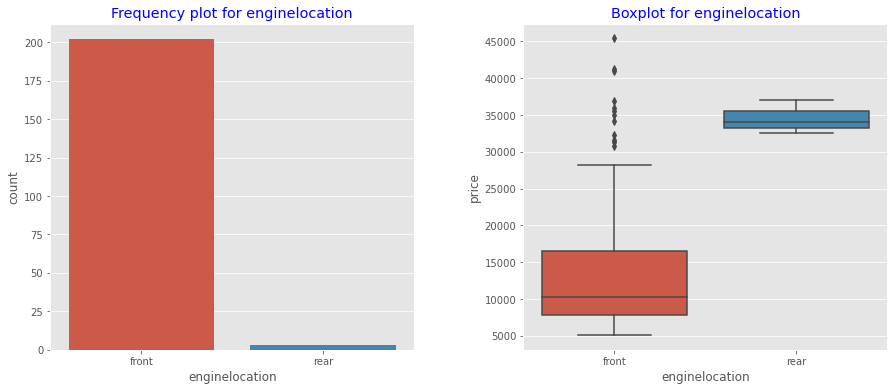

In [59]:
b.boxplot_countplot_features(carprice_df,'enginelocation','price')

## Observations from above plot
- Mostly sold cars are with enginelocation in front (202), followed by rear (3)
- cars with enginelocation front have more variance in price
- The mean and median price for enginelocation front is lowest (mean price - 12961.1 and median price - 10221.5) compared to enginelocation rear (mean price - 34528.0, median price - 34028.0) 
- maximum car price is for the car with enginelocation front
- 85% of car price for cars with enginelocation front is within the the range [5118.0, 18334.4]. Rest 15% are within the range of [18334.4, 45400.0]. Clearly there are outliers with maximum price of 45400.0
- 85% car price for cars with enginelocation rear within the range of [32528.0, 36128.0]. Rest 15% are within the range of [36128.0, 37028.0] with 37028.0 being the highest price. 

## 8. Lets plot frequency of different enginetype types and car price range

In [60]:
carprice_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [61]:
round(carprice_df.groupby('enginetype')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                            \
            count      mean       std      min       25%      50%       75%   
enginetype                                                                    
dohc         12.0  18116.42   7963.96   9298.0  15141.25  16249.0  18267.50   
dohcv         1.0  31400.50       NaN  31400.5  31400.50  31400.5  31400.50   
l            12.0  14627.58   3673.60   5151.0  13010.00  16105.0  16943.75   
ohc         148.0  11574.05   6407.83   5195.0   7383.50   9022.0  13522.50   
ohcf         15.0  13738.60  10930.48   5118.0   7533.00   9233.0  11476.50   
ohcv         13.0  25098.38  11442.93  13499.0  16500.00  19699.0  35056.00   
rotor         4.0  13020.00   2079.06  10945.0  11620.00  12745.0  14145.00   

                                                 
                 85%      90%     100%      max  
enginetype                                       
dohc        23390.50  30887.0  35550.0  35550.0  
dohcv       31400.50  31400.5  31400.5  31400.5  
l           17381.25  17862.5  18150.0  18150.0  
ohc         17658.05  18978.5  41315.0  41315.0  
ohcf        30444.60  33428.0  37028.0  37028.0  
ohcv        36992.00  39968.0  45400.0  45400.0  
rotor       14745.00  15045.0  15645.0  15645.0

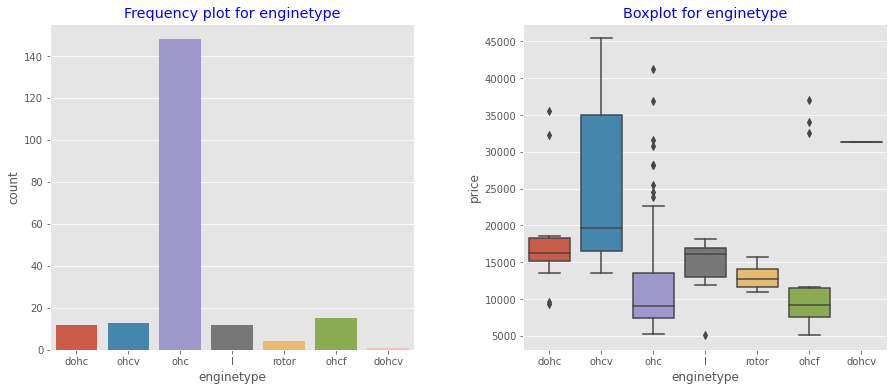

In [62]:
b.boxplot_countplot_features(carprice_df,'enginetype','price')

## Observations from above plot
- Mostly sold cars are with enginetype ohc (148), followed by ohcf (15), ohcv (13), l(12), dohc (12), rotor (4), dohcv (1 only)
- cars with enginetype ohcv have more variance in price
- The mean and median price for enginetype ohc is lowest (mean price - 11574.05 and median price - 9022.0) compared to enginetype dhcv is highest (mean price - 31400.50, median price - 31400.5) 
- maximum car price is for the car with enginetype ohcv 45400.0

## 9. Lets plot frequency of different types of cylindernumber and car price range 

In [63]:
carprice_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [64]:
round(carprice_df.groupby('cylindernumber')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                         \
                count      mean      std      min      25%      50%      75%   
cylindernumber                                                                 
eight             5.0  37400.10  5667.99  31400.5  34184.0  35056.0  40960.0   
five             11.0  21630.47  6091.39  13295.0  17580.0  18920.0  26864.0   
four            159.0  10285.75  3921.61   5118.0   7372.0   8948.0  12365.0   
six              24.0  23671.83  8850.14  13499.0  16374.5  21037.5  32319.5   
three             1.0   5151.00      NaN   5151.0   5151.0   5151.0   5151.0   
twelve            1.0  36000.00      NaN  36000.0  36000.0  36000.0  36000.0   
two               4.0  13020.00  2079.06  10945.0  11620.0  12745.0  14145.0   

                                                    
                    85%      90%     100%      max  
cylindernumber                                      
eight           42736.0  43624.0  45400.0  45400.0  
five            28212.0  28248.0  31600.0  31600.0  
four            15531.0  16725.0  22625.0  22625.0  
six             34865.1  36481.0  41315.0  41315.0  
three            5151.0   5151.0   5151.0   5151.0  
twelve          36000.0  36000.0  36000.0  36000.0  
two             14745.0  15045.0  15645.0  15645.0

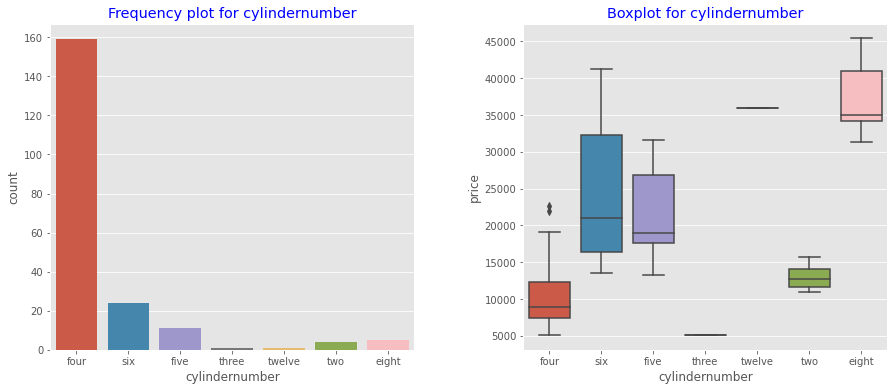

In [65]:
b.boxplot_countplot_features(carprice_df,'cylindernumber','price')

## Observations from above plot
- Mostly sold cars are for cylindernumber as four (159) is the highest followed by type six (24), type five (11), type eight (5), type two (4), type three (1) and type twelve (1)
- cars with cylindernumber as six have high variance in price 
- The mean and median car price for cylindernumber three is lowest (mean price - 5151.00, median price - 5151.0)
- The car price is highest for the cylindernumber eight (45400.0) and its the lowest for cylindernumber four (5118.0)	

## 10. Lets plot frequency of different fuelsystem and car price range

In [66]:
carprice_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [67]:
round(carprice_df.groupby('fuelsystem')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                           \
           count      mean      std      min       25%      50%       75%   
fuelsystem                                                                  
1bbl        11.0   7555.55  1390.12   5399.0   6692.00   7295.0   8370.00   
2bbl        66.0   7478.15  1385.36   5118.0   6593.50   7372.0   8330.75   
4bbl         3.0  12145.00  1374.77  10945.0  11395.00  11845.0  12745.00   
idi         20.0  15838.15  7759.84   7099.0   9120.00  13852.5  19375.50   
mfi          1.0  12964.00      NaN  12964.0  12964.00  12964.0  12964.00   
mpfi        94.0  17754.60  8685.89   7957.0  11619.75  15991.5  18942.50   
spdi         9.0  10990.44  2741.73   7689.0   9279.00   9959.0  12764.00   
spfi         1.0  11048.00      NaN  11048.0  11048.00  11048.0  11048.00   

                                                 
                 85%      90%     100%      max  
fuelsystem                                       
1bbl         8970.00   9095.0  10295.0  10295.0  
2bbl         8917.62   9091.0  11245.0  11245.0  
4bbl        13105.00  13285.0  13645.0  13645.0  
idi         25945.60  28183.2  31600.0  31600.0  
mfi         12964.00  12964.0  12964.0  12964.0  
mpfi        24874.75  33578.0  45400.0  45400.0  
spdi        14144.00  14565.0  14869.0  14869.0  
spfi        11048.00  11048.0  11048.0  11048.0

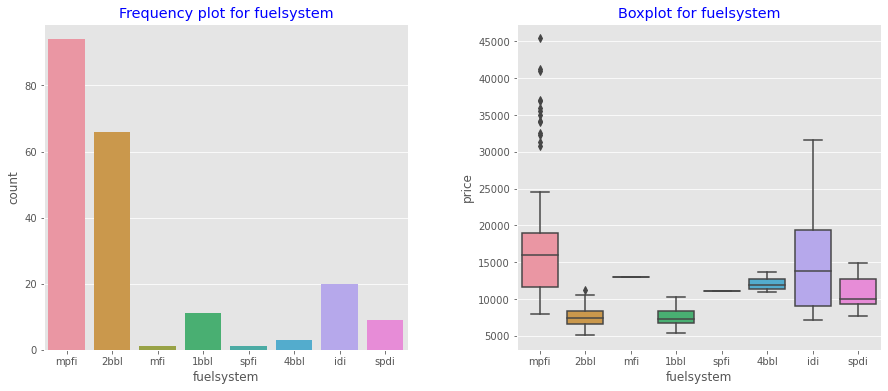

In [68]:
b.boxplot_countplot_features(carprice_df,'fuelsystem','price')

## Observations from above plot
- Mostly sold cars are for fuelsystem mpfi (94), followed by 2bbl (66), idi (20), 1bbl (11), spdi (9), 4bbl (3), mfi (1), spfi (1)
- cars with fuelsystem as mpfi have high variance in price, there are many outliers within the range of [24874.75,45400.0]. 
- The median price for fuelsystem 2bbl is the lowest (7478.15) while the median price of 1bbl is the lowest (7295.0)

## 11. Lets plot frequency of different company and car price range

In [69]:
carprice_df['company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64

In [70]:
round(carprice_df.groupby('company')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                           \
            count      mean      std      min       25%      50%       75%   
company                                                                      
alfa-romero   3.0  15498.33  1734.94  13495.0  14997.50  16500.0  16500.00   
audi          7.0  17859.17  3151.58  13950.0  16350.00  17710.0  18389.58   
bmw           8.0  26118.75  9263.83  16430.0  19958.75  22835.0  32290.00   
buick         8.0  33647.00  6789.56  25552.0  28230.00  32892.0  36532.00   
chevrolet     3.0   6007.00   754.42   5151.0   5723.00   6295.0   6435.00   
dodge         9.0   7875.44  2213.39   5572.0   6377.00   7609.0   8558.00   
honda        13.0   8184.69  2061.67   5399.0   6855.00   7295.0   9095.00   
isuzu         4.0   8916.50  1740.36   6785.0   8383.62   8916.5   9449.38   
jaguar        3.0  34600.00  2047.56  32250.0  33900.00  35550.0  35775.00   
mazda        17.0  10652.88  3975.68   5195.0   7395.00  10595.0  11845.00   
mercury       1.0  16503.00      NaN  16503.0  16503.00  16503.0  16503.00   
mitsubishi   13.0   9239.77  3043.00   5389.0   6989.00   8499.0   9959.00   
nissan       18.0  10415.67  4477.39   5499.0   7311.50   8124.0  13499.00   
peugeot      11.0  15489.09  2246.75  11900.0  13530.00  16630.0  16987.50   
plymouth      7.0   7963.43  2395.54   5572.0   6460.50   7609.0   8439.00   
porsche       5.0  31400.50  5654.09  22018.0  31400.50  32528.0  34028.00   
renault       2.0   9595.00   424.26   9295.0   9445.00   9595.0   9745.00   
saab          6.0  15223.33  2860.79  11850.0  12887.50  15275.0  17490.00   
subaru       12.0   8541.25  1940.19   5118.0   7378.75   7894.0  10019.50   
toyota       32.0   9885.81  3204.98   5348.0   7870.50   9103.0  10973.25   
volkswagen   12.0  10077.50  2178.55   7775.0   8145.00   9737.5  11768.75   
volvo        11.0  18063.18  3314.65  12940.0  16250.00  18420.0  20265.00   

                                                   
                  85%       90%     100%      max  
company                                            
alfa-romero  16500.00  16500.00  16500.0  16500.0  
audi         19415.50  20902.00  23875.0  23875.0  
bmw          36574.00  38210.50  41315.0  41315.0  
buick        40664.80  42292.00  45400.0  45400.0  
chevrolet     6491.00   6519.00   6575.0   6575.0  
dodge         8848.40   9729.60  12964.0  12964.0  
honda        10305.00  10335.00  12945.0  12945.0  
isuzu        10088.82  10408.55  11048.0  11048.0  
jaguar       35865.00  35910.00  36000.0  36000.0  
mazda        14845.00  16699.00  18344.0  18344.0  
mercury      16503.00  16503.00  16503.0  16503.0  
mitsubishi   13001.00  14117.00  14869.0  14869.0  
nissan       15659.00  17559.00  19699.0  19699.0  
peugeot      17512.50  17950.00  18150.0  18150.0  
plymouth      9305.30  10458.20  12764.0  12764.0  
porsche      35228.00  35828.00  37028.0  37028.0  
renault       9805.00   9835.00   9895.0   9895.0  
saab         18267.50  18385.00  18620.0  18620.0  
subaru       10569.35  11152.90  11694.0  11694.0  
toyota       12998.35  15744.00  17669.0  17669.0  
volkswagen   12641.75  13194.50  13845.0  13845.0  
volvo        21977.50  22470.00  22625.0  22625.0

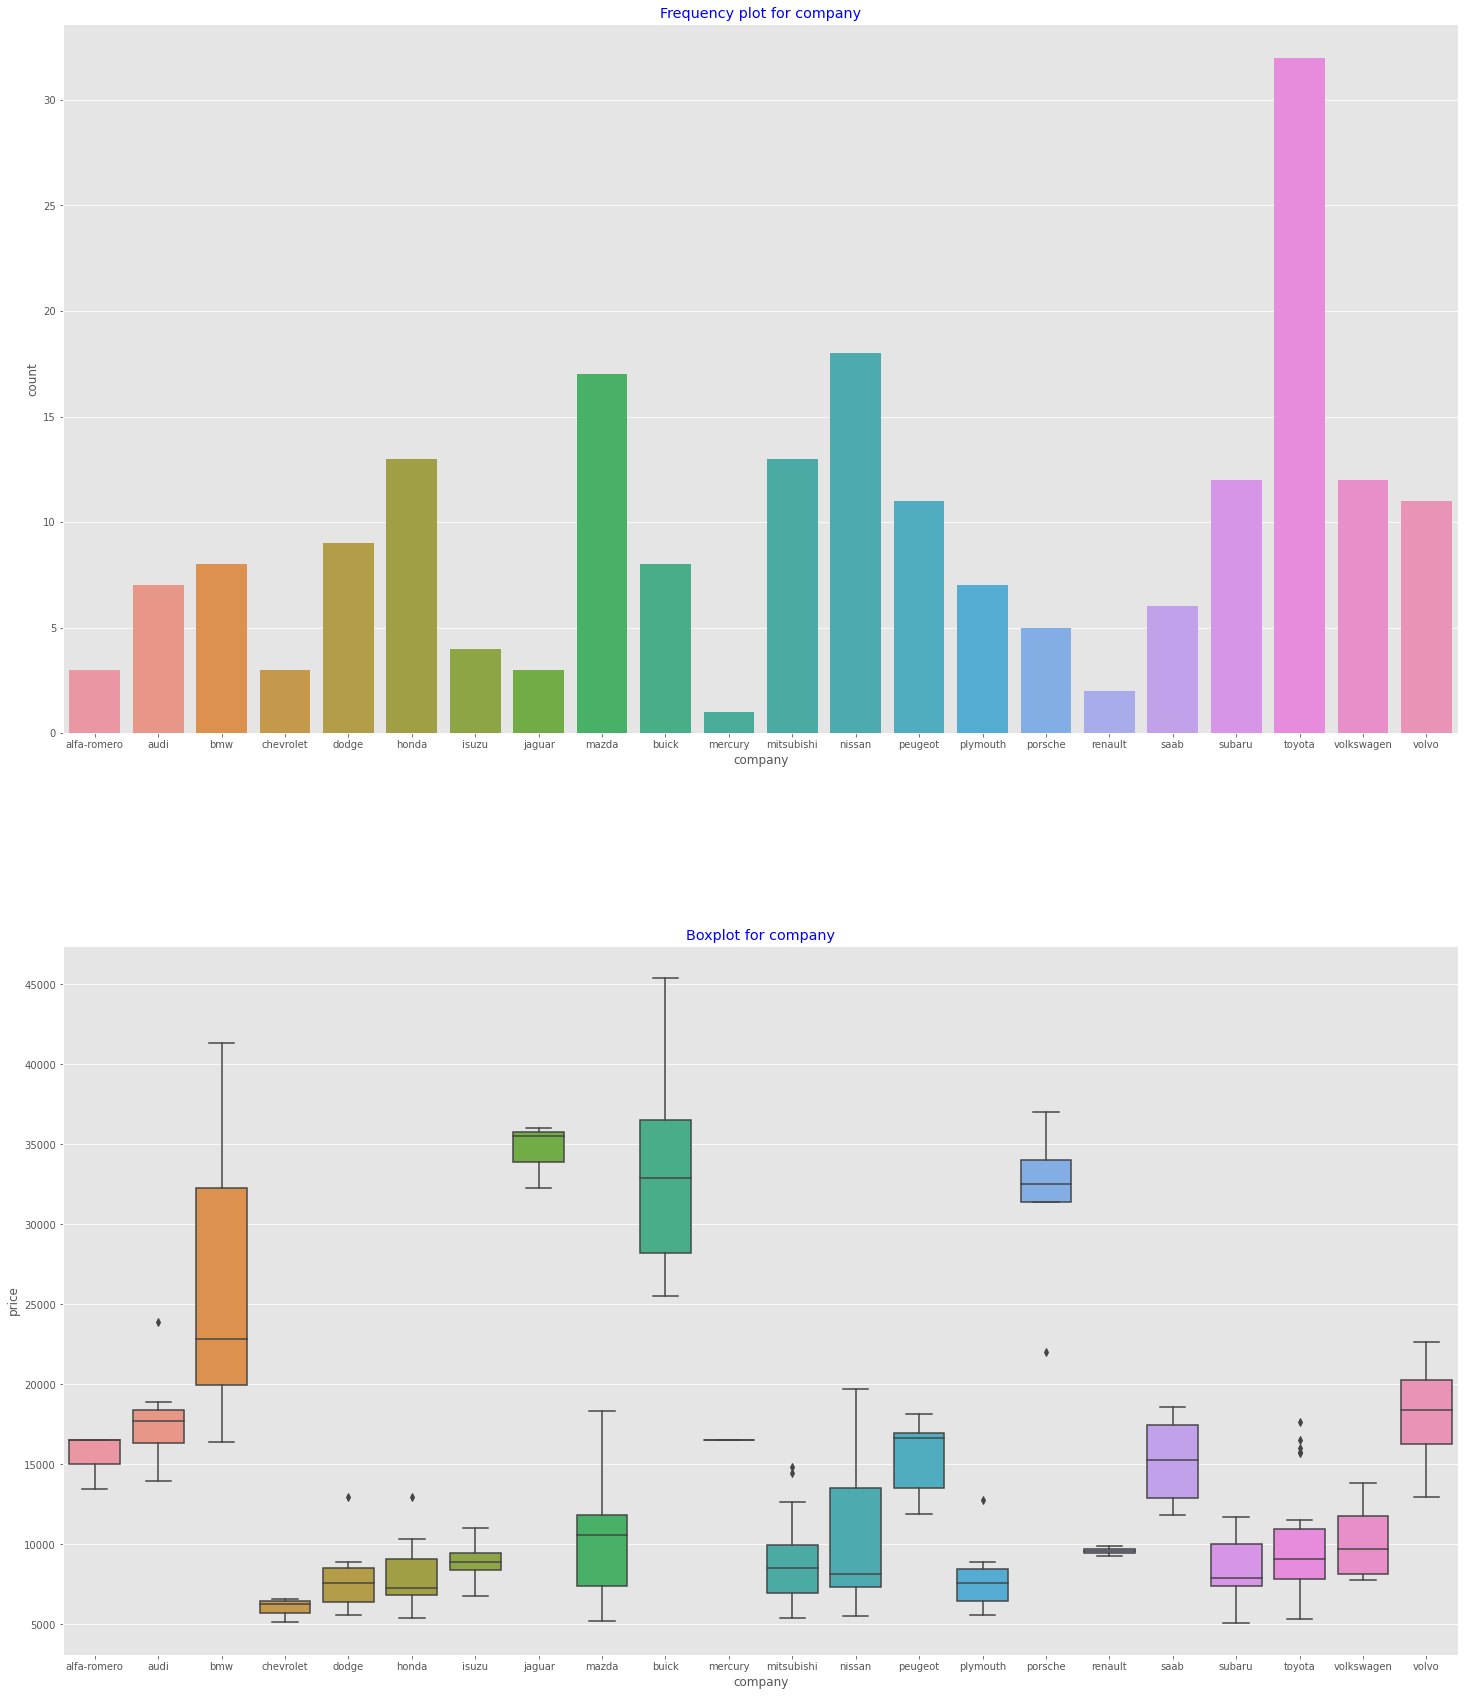

In [71]:
b.boxplot_countplot_features(carprice_df,'company','price',True)

## Observations from above plot
- Mostly sold cars are for company toyota toyota(32), followed by nissan(18), mazda(17),honda(13), mitsubishi(13), volkswagen(12), subaru(12), peugeot(11), volvo(11) and others
- cars of company bmw have high variance in price
- The mean and median car price of company chevrolet is the lowest (mean price - 6007.00, median price - 6295.0)
- The mean and median car price of company jaguar is the highest (mean price - 34600.00, median price - 35550.0)
- The maximum price car is for company buick (45400.0)